In [1]:
import datetime

import numpy             as np
import matplotlib.pyplot as plt

from CCfun  import in_range
from CCfun  import filter_df
from CCfun  import longer_than_exwl
from CCfun  import find_crystal_position
from CCfun  import remove_spikes

from CCfit  import fit
from CCfit  import polynom
from CCfit  import gauss_poly
from CCfit  import double_gauss_poly
from CCfit  import triple_gauss_poly

from CCplot import auto_plot_style
from CCplot import plot1d
from CCplot import plot2d

from CCio import load_and_process
from CCio import load_references_from_h5

In [2]:
%matplotlib inline

auto_plot_style({"lines.linewidth": 2, "font.size":20})

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def calculate_irradiation_times(dates):
    dates = np.asarray(dates[1:])
    dates = dates.reshape(dates.size // 2, 2)
    return [t[0].total_seconds() / 3600 for t in np.diff(dates, axis=1)]

def load(filename, i):
    print(filename)
    df = load_and_process(filename, i).crystals
    df = filter_df(df, crystal=10)
    return df.groupby("state", as_index=False)\
             .apply(remove_spikes)\
             .reset_index(drop=True)

# All data

In [5]:
dates = [
datetime.datetime(2020, 4, 21,  1, 22), # Scan LiF crystals
datetime.datetime(2020, 4, 21,  6, 32), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 4, 23, 13, 23), # Scan LiF crystals
datetime.datetime(2020, 4, 23, 18, 33), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 4, 25,  0,  3), # Scan LiF crystals
datetime.datetime(2020, 4, 25,  5, 13), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 4, 27, 19, 38), # Scan LiF crystals
datetime.datetime(2020, 4, 28,  0, 48), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 4, 30,  2, 54), # Scan LiF crystals
datetime.datetime(2020, 4, 30,  8,  4), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 5,  3,  1, 56), # Scan LiF crystals
datetime.datetime(2020, 5,  3,  7,  6), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 5,  3, 13, 49), # Scan LiF crystals
datetime.datetime(2020, 5,  3, 18, 59), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 5,  4,  3, 35), # Scan LiF crystals
datetime.datetime(2020, 5,  4,  8, 45), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 5,  6, 12, 46), # Scan LiF crystals
datetime.datetime(2020, 5,  6, 17, 56), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 5, 10, 13, 10), # Scan LiF crystals
datetime.datetime(2020, 5, 10, 18, 20), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 5, 13,  3, 40), # Scan LiF crystals
datetime.datetime(2020, 5, 13,  8, 50), # Irradiating Crystal 10 (CaF long, non-annealed)
datetime.datetime(2020, 5, 15, 22, 37), # Scan LiF crystals
datetime.datetime(2020, 5, 16,  3, 47), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 5, 18, 14, 41), # Start scan stuck in position 0 due to software failure 18/05/2020 @ 18:37: Scan LiF crystals
datetime.datetime(2020, 5, 18, 23, 46), # Irradiating Crystal 10 (CaF, long)
#datetime.datetime(2020, 5, 19, 18, 44), # Scan CaF crystals
#datetime.datetime(2020, 5, 19, 23, 54), # Irradiating Crystal 10 (CaF, long)
#datetime.datetime(2020, 5, 21, 22, 49), # Scan LiF crystals
#datetime.datetime(2020, 5, 22,  3, 58), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 5, 24, 15,  9), # Scan CaF crystals
datetime.datetime(2020, 5, 24, 20, 17), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 5, 26, 17, 26), # Scan CaF crystals
datetime.datetime(2020, 5, 26, 22, 36), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 5, 30, 15, 56), # Scan CaF crystals
datetime.datetime(2020, 5, 30, 21,  6), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 6,  2, 14, 50), # Scan CaF crystals
datetime.datetime(2020, 6,  2, 20,  0), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 6,  5,  2,  0), # Scan CaF crystals
datetime.datetime(2020, 6,  5,  7, 10), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 6,  8, 20, 15), # Scan CaF crystals
datetime.datetime(2020, 6,  9,  1, 25), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 6, 12, 11, 32), # Scan CaF crystals
datetime.datetime(2020, 6, 12, 16, 42), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 6, 15, 19, 27), # Scan CaF crystals
datetime.datetime(2020, 6, 16,  0, 38), # Irradiating Crystal 10 (CaF, long)
datetime.datetime(2020, 6, 20, 14, 16), # Scan CaF crystals

]

irradiation_times = calculate_irradiation_times(dates)
irrad_time  = np.cumsum(np.append([0], irradiation_times))

In [6]:
irradiation_times

[54.85,
 29.5,
 62.416666666666664,
 50.1,
 65.86666666666666,
 6.716666666666667,
 8.6,
 52.016666666666666,
 91.23333333333333,
 57.333333333333336,
 61.78333333333333,
 58.9,
 135.38333333333333,
 45.15,
 89.33333333333333,
 65.73333333333333,
 54.0,
 85.08333333333333,
 82.11666666666666,
 74.75,
 109.63333333333334]

In [7]:
filenames = ["/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_21_01_22_09_296000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_23_13_23_17_384000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_25_00_02_46_010000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_27_19_38_26_589000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_30_02_54_18_370000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_03_01_55_42_712000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_03_13_49_29_815000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_04_03_35_05_148000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_06_12_46_41_542000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_10_13_09_48_514000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_13_03_40_11_291000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_15_22_36_27_269000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_18_18_36_27_229800.h5",
#             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_05_19_18_44_34_035000.h5",
#             "/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_21_22_48_52_962000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_05_24_15_08_36_393000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_05_26_17_26_11_179000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_05_30_15_56_05_301000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_06_02_14_50_17_234000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_06_05_02_00_12_377000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_06_08_20_15_05_994000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_06_12_11_32_22_763000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_06_15_19_27_21_550000.h5",
             "/home/gonzalo/data/CC/cs137_irrad_caf_2020_06_20_14_15_59_741000.h5",
            ]

dfs  = [load(filename, i) for i, filename in enumerate(filenames)]
refs = [load_references_from_h5(filename) for i, filename in enumerate(filenames)]

/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_21_01_22_09_296000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_23_13_23_17_384000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_25_00_02_46_010000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_27_19_38_26_589000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_04_30_02_54_18_370000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_03_01_55_42_712000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_03_13_49_29_815000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_04_03_35_05_148000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_06_12_46_41_542000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_10_13_09_48_514000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_13_03_40_11_291000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_15_22_36_27_269000.h5
/home/gonzalo/data/CC/cs137_irrad_v1_2020_05_18_18_36_27_229800.h5
/home/gonzalo/data/CC/cs137_irrad_caf_2020_05_24_15_08_36_393000.h5
/home/gonzalo/data/CC/cs137_irrad_caf_2020_05_26_17_26_11_179

Text(0.5, 1.0, 'Reference Spphire')

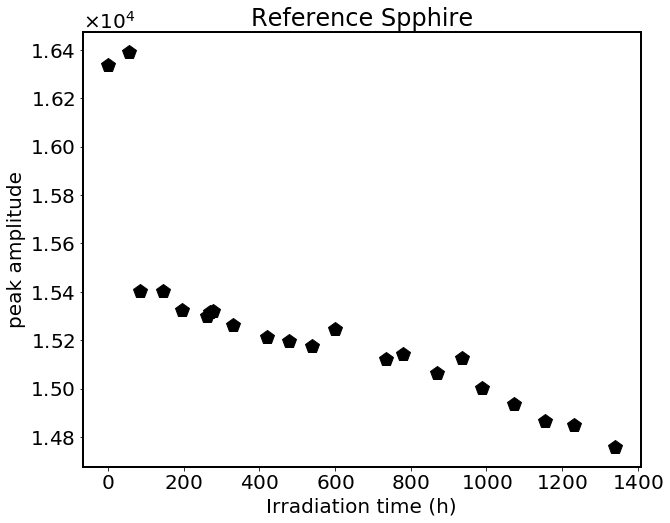

In [8]:
maxs = []

for i, df in enumerate(refs):
    df = filter_df(df, crystal=0)
    #plt.plot(df.em_wl, df.counts / df.power, label=str(i))
    maxs.append((df.counts).quantile(0.99))
plt.figure()
plt.plot(irrad_time, maxs, "p")
plt.xlabel("Irradiation time (h)")
plt.ylabel("peak amplitude")
plt.title("Reference Spphire")

Text(0.5, 1.0, 'Reference Spphire')

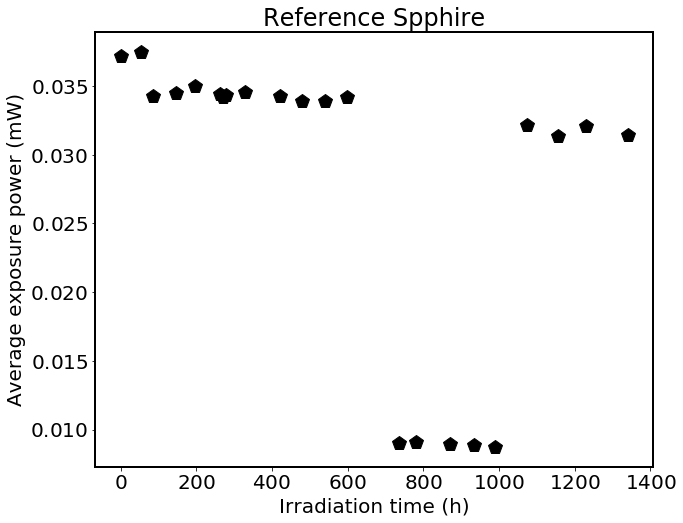

In [9]:
pows = []

for i, df in enumerate(refs):
    df = filter_df(df, crystal=0)
    pows.append(df.power.mean() *1e3)

plt.plot(irrad_time, pows, "p")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Average exposure power (mW)")
plt.title("Reference Spphire")

In [10]:
dfs[0].head()

full_scan  crystal  grating  exp_index  slit_width  state  exposure  ex_wl  \
0       True       10        2          0        1000    272       0.2  800.0   
1       True       10        2          0        1000    272       0.2  800.0   
2       True       10        2          0        1000    272       0.2  800.0   
3       True       10        2          0        1000    272       0.2  800.0   
4       True       10        2          0        1000    272       0.2  800.0   

          power           timestamp  em_wl  counts  crystal_id crystal_type  \
0  6.390601e-07 2020-04-21 02:29:46  833.5  4447.0  CaF_B1_293          CaF   
1  6.390601e-07 2020-04-21 02:29:46  834.0  4453.0  CaF_B1_293          CaF   
2  6.390601e-07 2020-04-21 02:29:46  834.5  4409.0  CaF_B1_293          CaF   
3  6.390601e-07 2020-04-21 02:29:46  835.0  4458.0  CaF_B1_293          CaF   
4  6.390601e-07 2020-04-21 02:29:46  835.5  4380.0  CaF_B1_293          CaF   

   bkgsub    rate       quantar       dquanta  wheel_no  
0  1362.0  6810.0  2.573966e+14  2.645722e-11         0  
1  1372.0  6860.0  2.573966e+14  2.665148e-11         0  
2  1331.0  6655.0  2.573966e+14  2.585504e-11         0  
3  1387.0  6935.0  2.573966e+14  2.694286e-11         0  
4  1300.0  6500.0  2.573966e+14  2.525286e-11         0

# All wavelengths

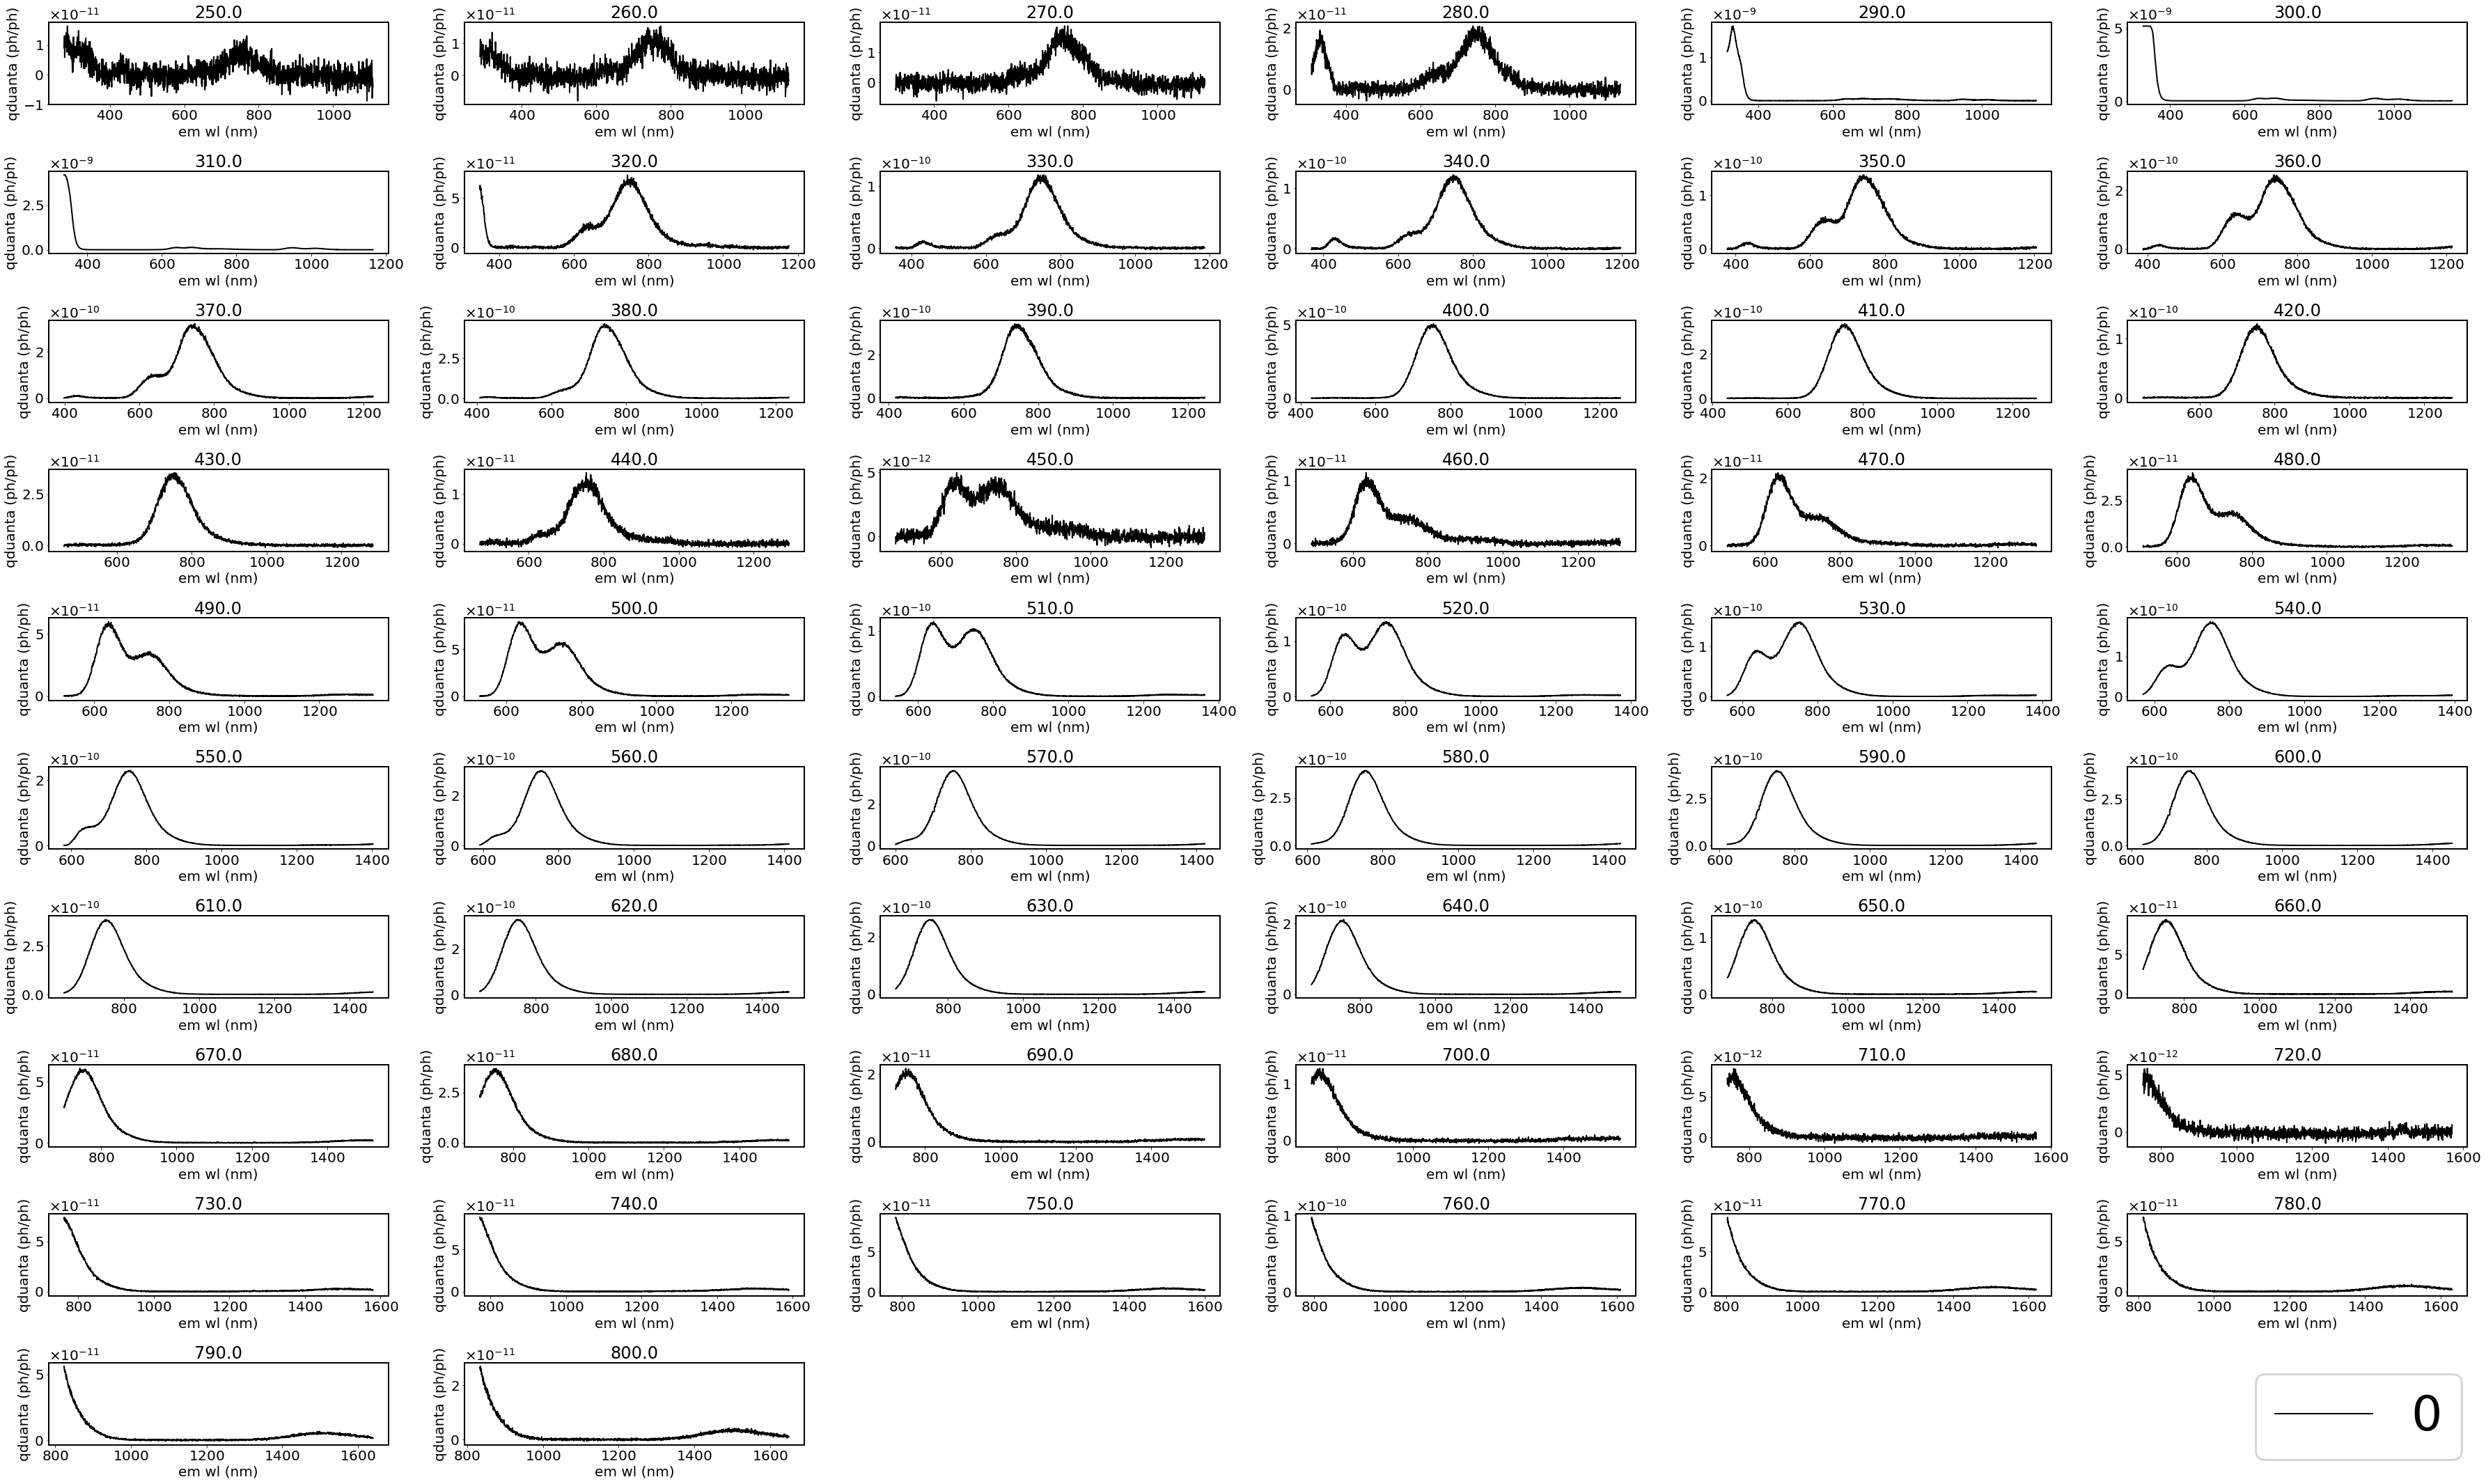

In [11]:
plt.figure(figsize=(10*5, 6*5))

for n, df in enumerate(dfs[:1]):
    groups = filter_df(df, crystal=10, exposure=.2).groupby("ex_wl")

    for k, (ex_wl, data) in enumerate(groups, start=1):
        plt.subplot(10, 6, k)
        data = data.loc[data.grating == 1 + int(ex_wl >= 400)]
        plt.plot(data.em_wl, data.dquanta, label=str(n), lw=2)
        
        if n == 0:
            plt.xlabel("em wl (nm)")
            plt.ylabel("qduanta (ph/ph)")
            plt.title (str(ex_wl))

handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, loc="lower right", prop={'size': 70}, ncol=len(dfs))

plt.tight_layout()
plt.savefig("/home/gonzalo/Escritorio/caf_10.pdf")

# 410 nm

Text(0, 0.5, 'qduanta (ph/ph)')

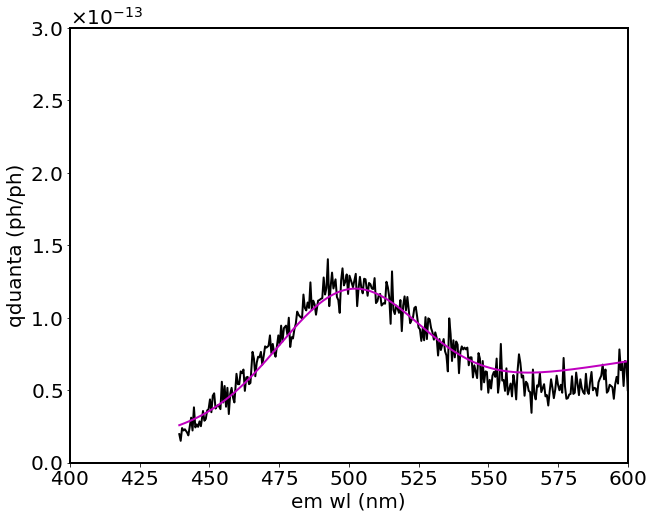

In [12]:
data = filter_df(dfs[0], crystal=10, grating=2, exposure=2, ex_wl=410)
plt.plot(data.em_wl, data.dquanta, lw=2)

seed = 5e-12, 500, 25, -1.1e-13, 3e-16

plt.plot(data.em_wl, gauss_poly(data.em_wl, *seed))

plt.xlim(400, 600)
plt.ylim(0, 3e-13)
plt.xlabel("em wl (nm)")
plt.ylabel("qduanta (ph/ph)")

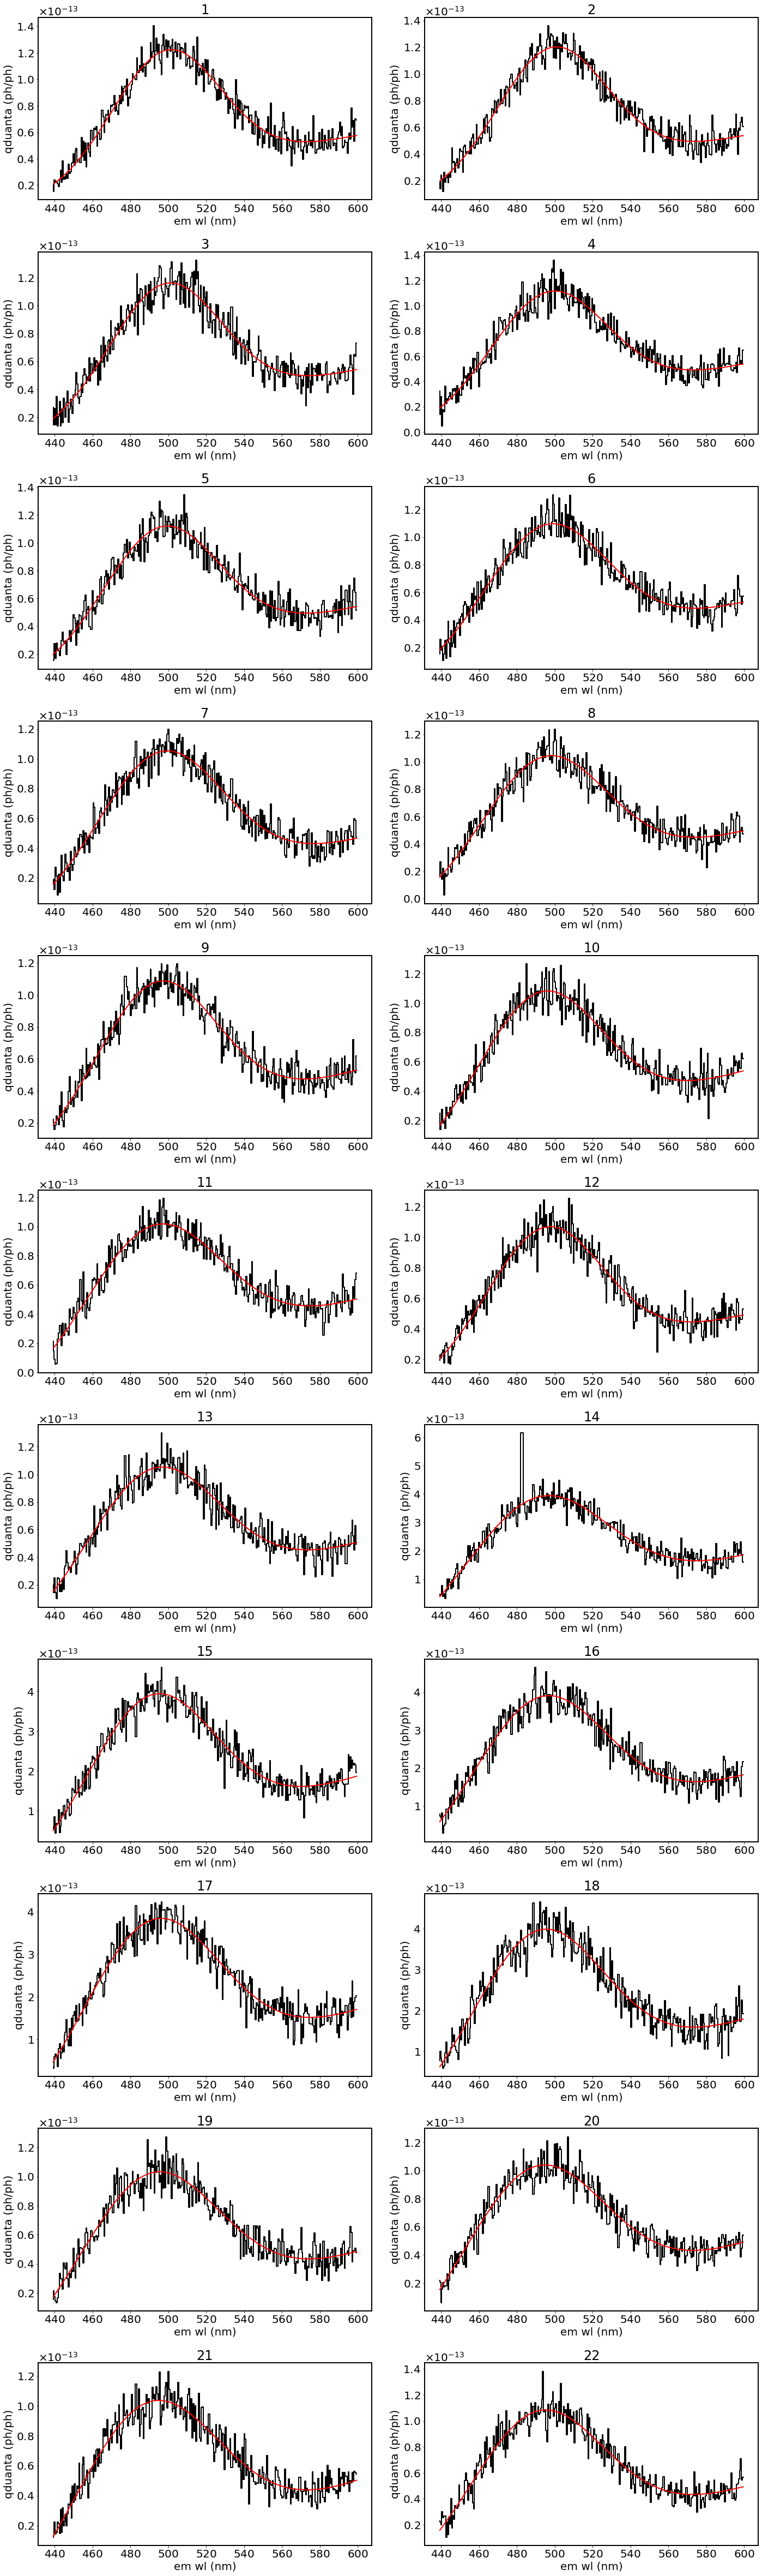

In [13]:
nhalf = int(np.ceil(len(dfs)/2))

plt.figure(figsize=(10*2, 6*nhalf))

fit_values = []

for n, df in enumerate(dfs, start=1):
    data = filter_df(df, crystal=10, grating=2, exposure=2, ex_wl=410)
    data = data[in_range(data.em_wl, 0, 600)]

    seed = 5e-12, 500, 25, -1.1e-13, 3e-16
    f    = fit(gauss_poly, data.em_wl.values, data.dquanta.values,
               seed      = seed,
               maxfev    = 10**5)

    fit_values.append(f.values)
    
    plt.subplot(nhalf, 2, n)
    plt.plot(data.em_wl, data.dquanta, label=str(n), drawstyle="steps")
    plt.plot(data.em_wl, f.fn(data.em_wl), "r-")

    plt.xlabel("em wl (nm)")
    plt.ylabel("qduanta (ph/ph)")
    plt.title (str(n))

plt.tight_layout()

fit_values = np.stack(fit_values)

In [14]:
irrad_time  = np.cumsum(np.append([0], irradiation_times))
a1, m1, s1, p11, p12 = fit_values.T 

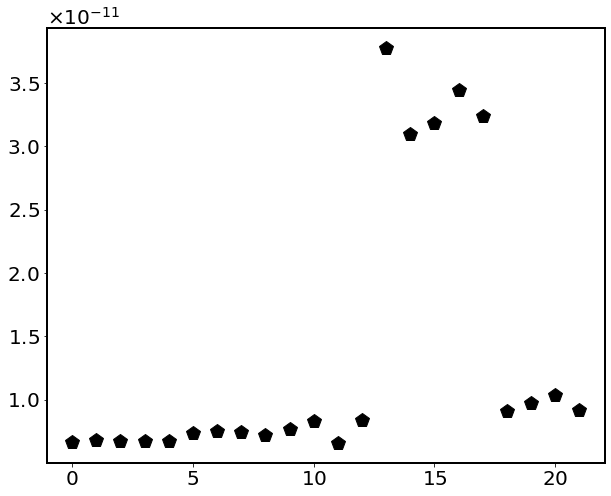

In [15]:
plt.plot(np.arange(len(a1)), a1, "p");

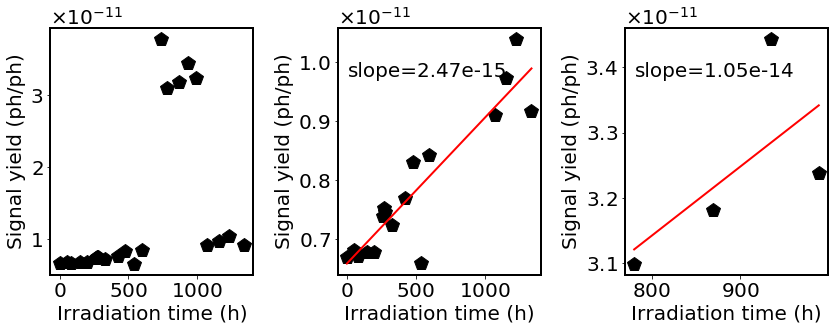

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
s  = slice(None)
plt.plot(irrad_time[s], a1[s], "p")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Signal yield (ph/ph)")

plt.subplot(1, 3, 2)
s  = [True]*13 + [False] * 5 + [True] * (len(a1) - 18)
f  = fit(polynom, irrad_time[s], a1[s], (0, 1))
plt.plot(irrad_time[s], a1[s], "p", label=f"$I_1$: {f.values[0]:.2e} + {f.values[1]:.2e} t")
plt.plot(irrad_time[s], f.fn(irrad_time[s]), "-r")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Signal yield (ph/ph)")
plt.text(0.05, .8, f"slope={f.values[1]:.2e}", transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
s  = [False]*14 + [True] * 4 + [False] * (len(a1) - 18)
f  = fit(polynom, irrad_time[s], a1[s], (0, 1))
plt.plot(irrad_time[s], a1[s], "p", label=f"$I_1$: {f.values[0]:.2e} + {f.values[1]:.2e} t")
plt.plot(irrad_time[s], f.fn(irrad_time[s]), "-r")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Signal yield (ph/ph)")
plt.text(0.05, .8, f"slope={f.values[1]:.2e}", transform=plt.gca().transAxes)


plt.tight_layout()

Text(0, 0.5, 'Peak centroid (nm)')

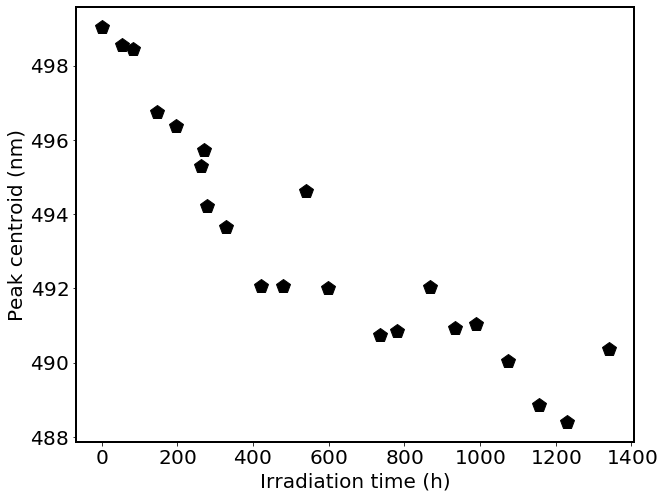

In [17]:
plt.plot(irrad_time, m1, "pk", label="$\mu_1$")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak centroid (nm)")

Text(0, 0.5, 'Peak width (nm)')

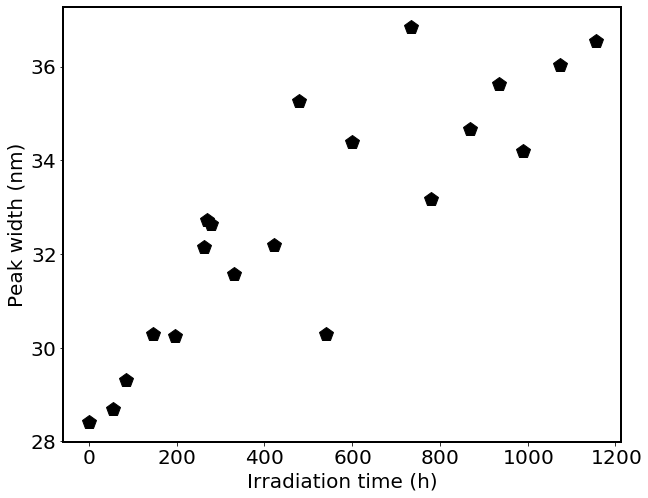

In [18]:
plt.plot(irrad_time, s1, "pk", label="$\sigma_1$")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak width (nm)")

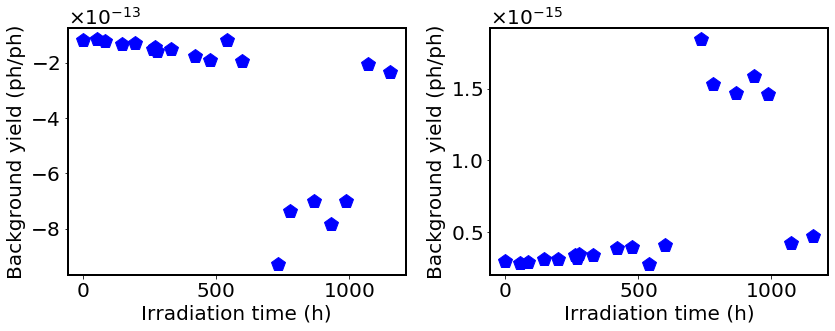

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(irrad_time, p11, "pb")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Background yield (ph/ph)");

plt.subplot(1, 2, 2)
plt.plot(irrad_time, p12, "pb")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Background yield (ph/ph)");

plt.tight_layout()

# 600 nm

Text(0, 0.5, 'qduanta (ph/ph)')

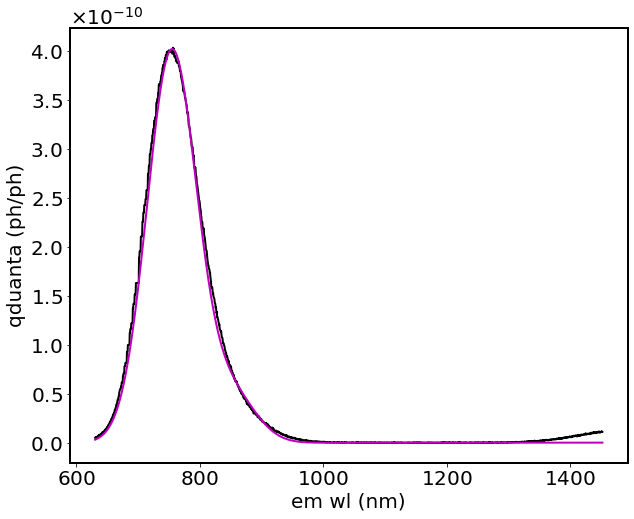

In [20]:
data = filter_df(dfs[0], crystal=10, grating=2, exposure=.2, ex_wl=600)
plt.plot(data.em_wl, data.dquanta, lw=2)

seed = 4e-8, 755, 40, 5e-9, 850, 40, -1.1e-13, 3e-16

plt.plot(data.em_wl, double_gauss_poly(data.em_wl, *seed))

plt.xlabel("em wl (nm)")
plt.ylabel("qduanta (ph/ph)")

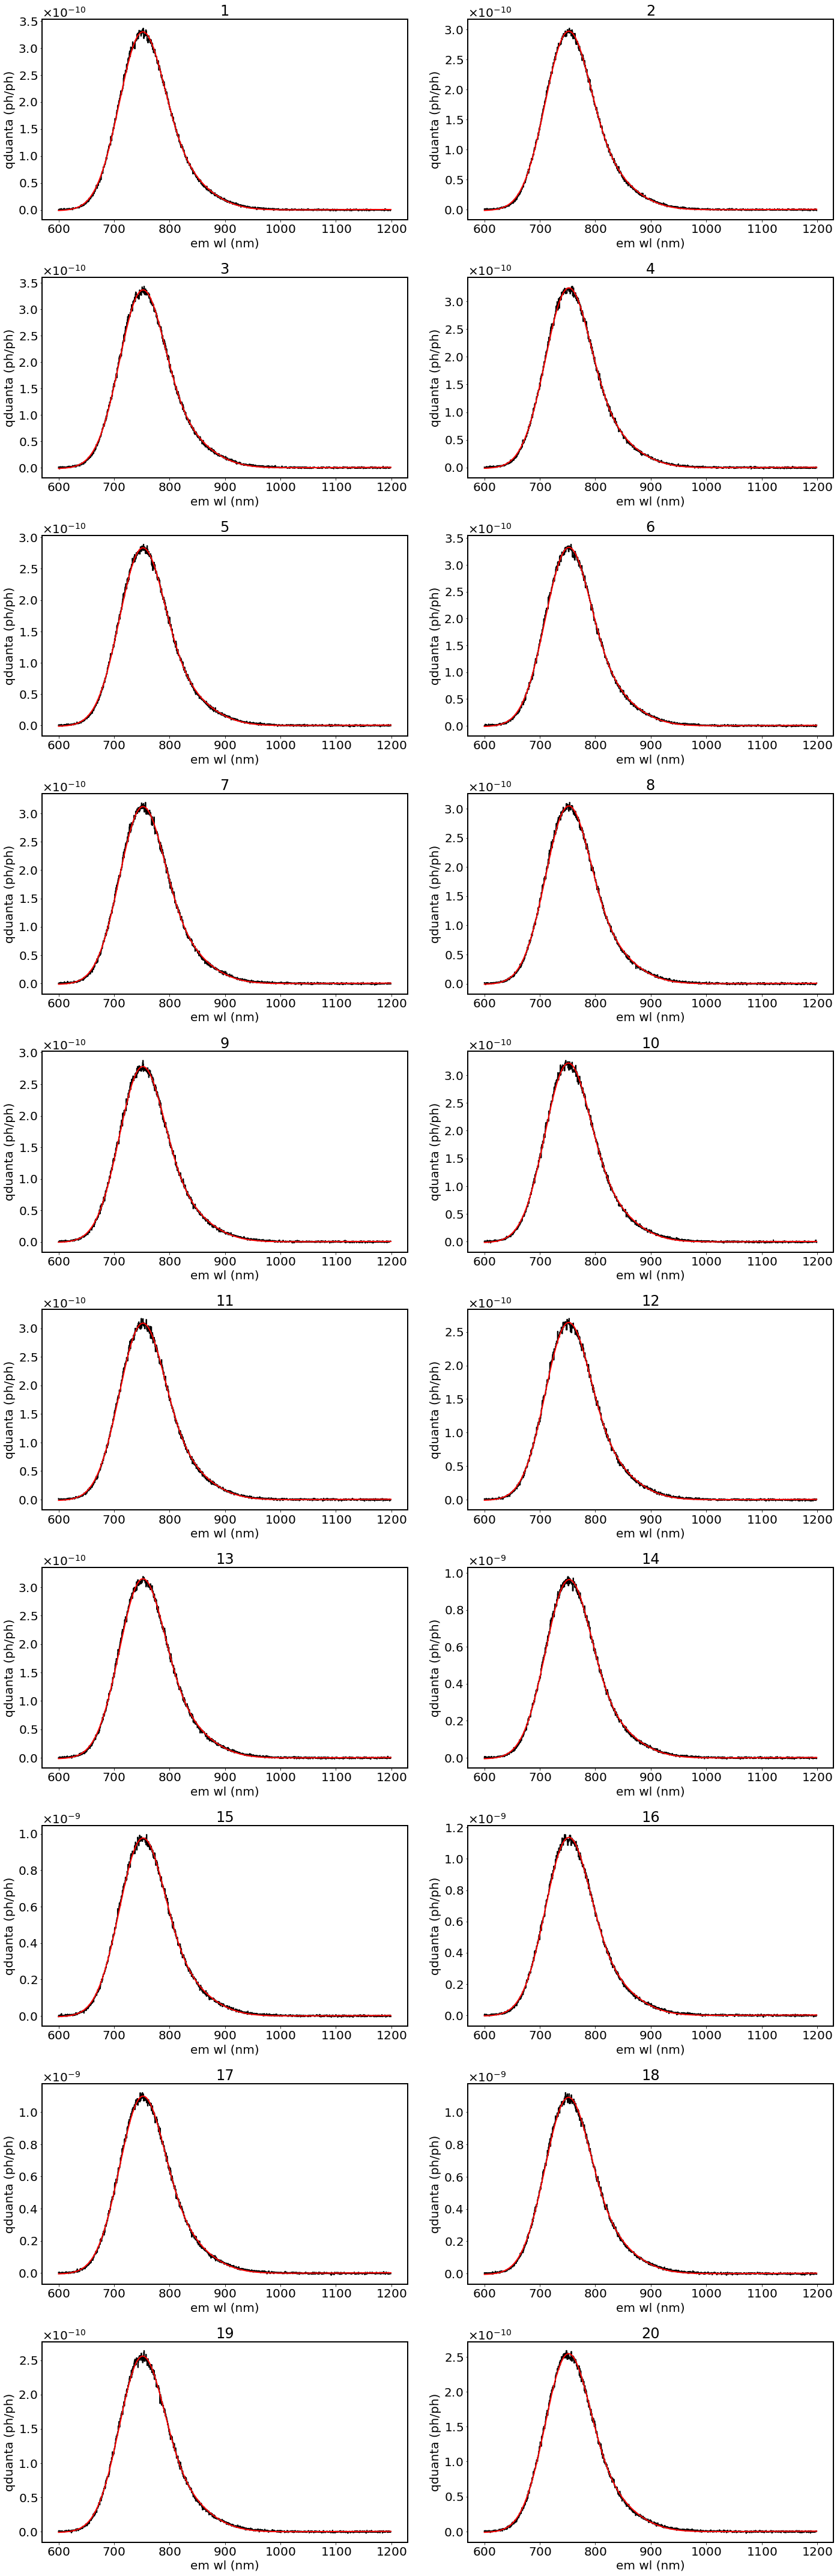

In [21]:
nhalf = int(np.ceil(len(dfs)/2))

plt.figure(figsize=(10*2, 6*nhalf))

fit_values = []

for n, df in enumerate(dfs, start=1):
    data = filter_df(df, crystal=10, grating=2, exposure=.2, ex_wl=410)
    data = data[in_range(data.em_wl, 600, 1200)]

    seed = 4e-8, 755, 40, 5e-9, 850, 40, -1.1e-13, 3e-16
    f    = fit(double_gauss_poly, data.em_wl.values, data.dquanta.values,
               seed      = seed,
               maxfev    = 10**5)

    fit_values.append(f.values)
    
    plt.subplot(nhalf, 2, n)
    plt.plot(data.em_wl, data.dquanta, label=str(n), drawstyle="steps")
    plt.plot(data.em_wl, f.fn(data.em_wl), "r-")

    plt.xlabel("em wl (nm)")
    plt.ylabel("qduanta (ph/ph)")
    plt.title (str(n))

plt.tight_layout()

fit_values = np.stack(fit_values)

In [22]:
irrad_time  = np.cumsum(np.append([0], irradiation_times))
a1, m1, s1, a2, m2, s2, p11, p12 = fit_values.T 

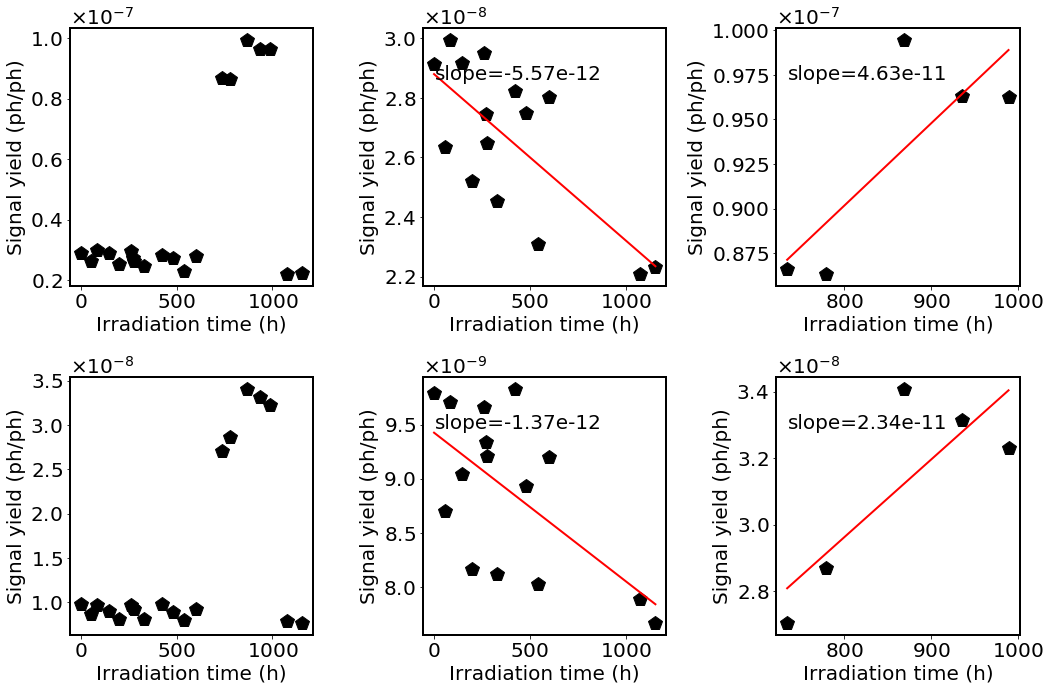

In [23]:
plt.figure(figsize=(15, 10))
for k, a in enumerate([a1, a2]):
    plt.subplot(2, 3, 1 + 3*k)
    s  = slice(None)
    plt.plot(irrad_time[s], a[s], "p")
    plt.xlabel("Irradiation time (h)")
    plt.ylabel("Signal yield (ph/ph)")

    plt.subplot(2, 3, 2 + 3*k)
    s  = [True]*13 + [False] * 5 + [True] * (len(a1) - 18)
    f  = fit(polynom, irrad_time[s], a[s], (0, 1))
    plt.plot(irrad_time[s], a[s], "p", label=f"$I_1$: {f.values[0]:.2e} + {f.values[1]:.2e} t")
    plt.plot(irrad_time[s], f.fn(irrad_time[s]), "-r")
    plt.xlabel("Irradiation time (h)")
    plt.ylabel("Signal yield (ph/ph)")
    plt.text(0.05, .8, f"slope={f.values[1]:.2e}", transform=plt.gca().transAxes)

    plt.subplot(2, 3, 3 + 3*k)
    s  = [not si for si in s]
    f  = fit(polynom, irrad_time[s], a[s], (0, 1))
    plt.plot(irrad_time[s], a[s], "p", label=f"$I_1$: {f.values[0]:.2e} + {f.values[1]:.2e} t")
    plt.plot(irrad_time[s], f.fn(irrad_time[s]), "-r")
    plt.xlabel("Irradiation time (h)")
    plt.ylabel("Signal yield (ph/ph)")
    plt.text(0.05, .8, f"slope={f.values[1]:.2e}", transform=plt.gca().transAxes)


plt.tight_layout()

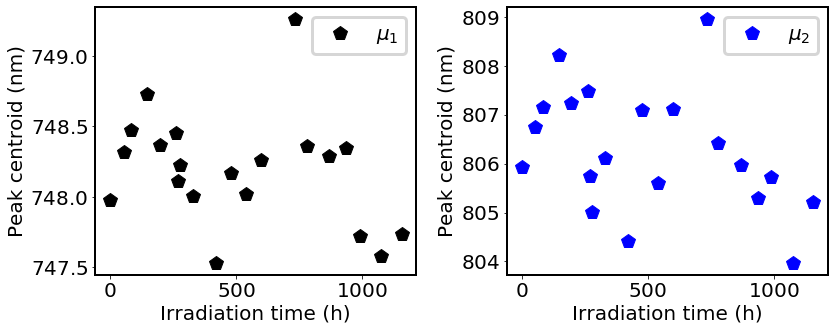

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(irrad_time, m1, "pk", label="$\mu_1$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak centroid (nm)")

plt.subplot(1, 2, 2)
plt.plot(irrad_time, m2, "pb", label="$\mu_2$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak centroid (nm)")

plt.tight_layout()

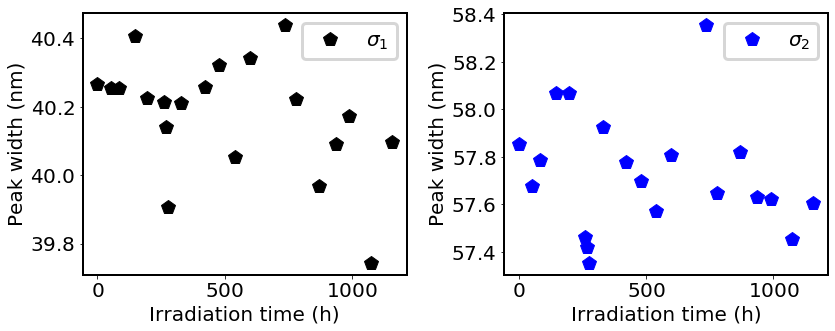

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(irrad_time, s1, "pk", label="$\sigma_1$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak width (nm)")

plt.subplot(1, 2, 2)
plt.plot(irrad_time, s2, "pb", label="$\sigma_2$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak width (nm)")

plt.tight_layout()

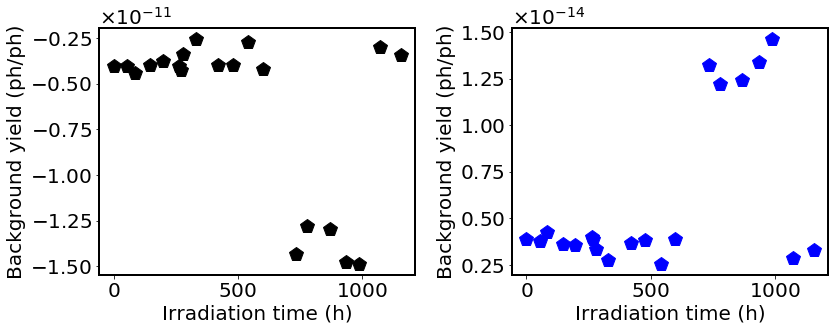

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(irrad_time, p11, "pk")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Background yield (ph/ph)");

plt.subplot(1, 2, 2)
plt.plot(irrad_time, p12, "pb")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Background yield (ph/ph)");

plt.tight_layout()

# 400 nm

Text(0, 0.5, 'qduanta (ph/ph)')

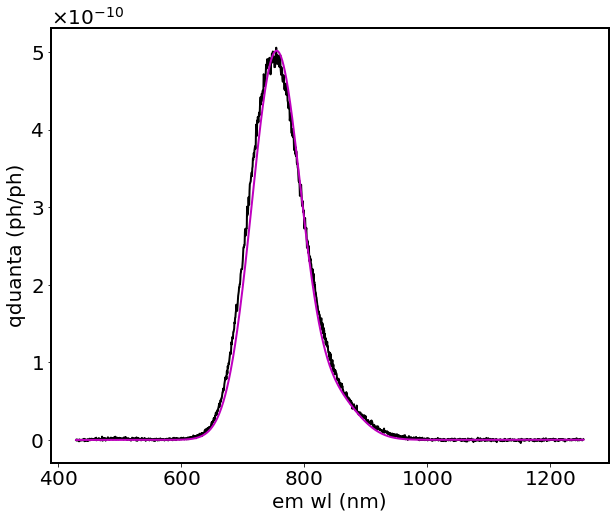

In [27]:
data = filter_df(dfs[0], crystal=10, grating=2, exposure=.2, ex_wl=400)
plt.plot(data.em_wl, data.dquanta, lw=2)

seed = 5e-8, 755, 40, 5e-9, 850, 40, -1.1e-13, 3e-16

plt.plot(data.em_wl, double_gauss_poly(data.em_wl, *seed))

plt.xlabel("em wl (nm)")
plt.ylabel("qduanta (ph/ph)")

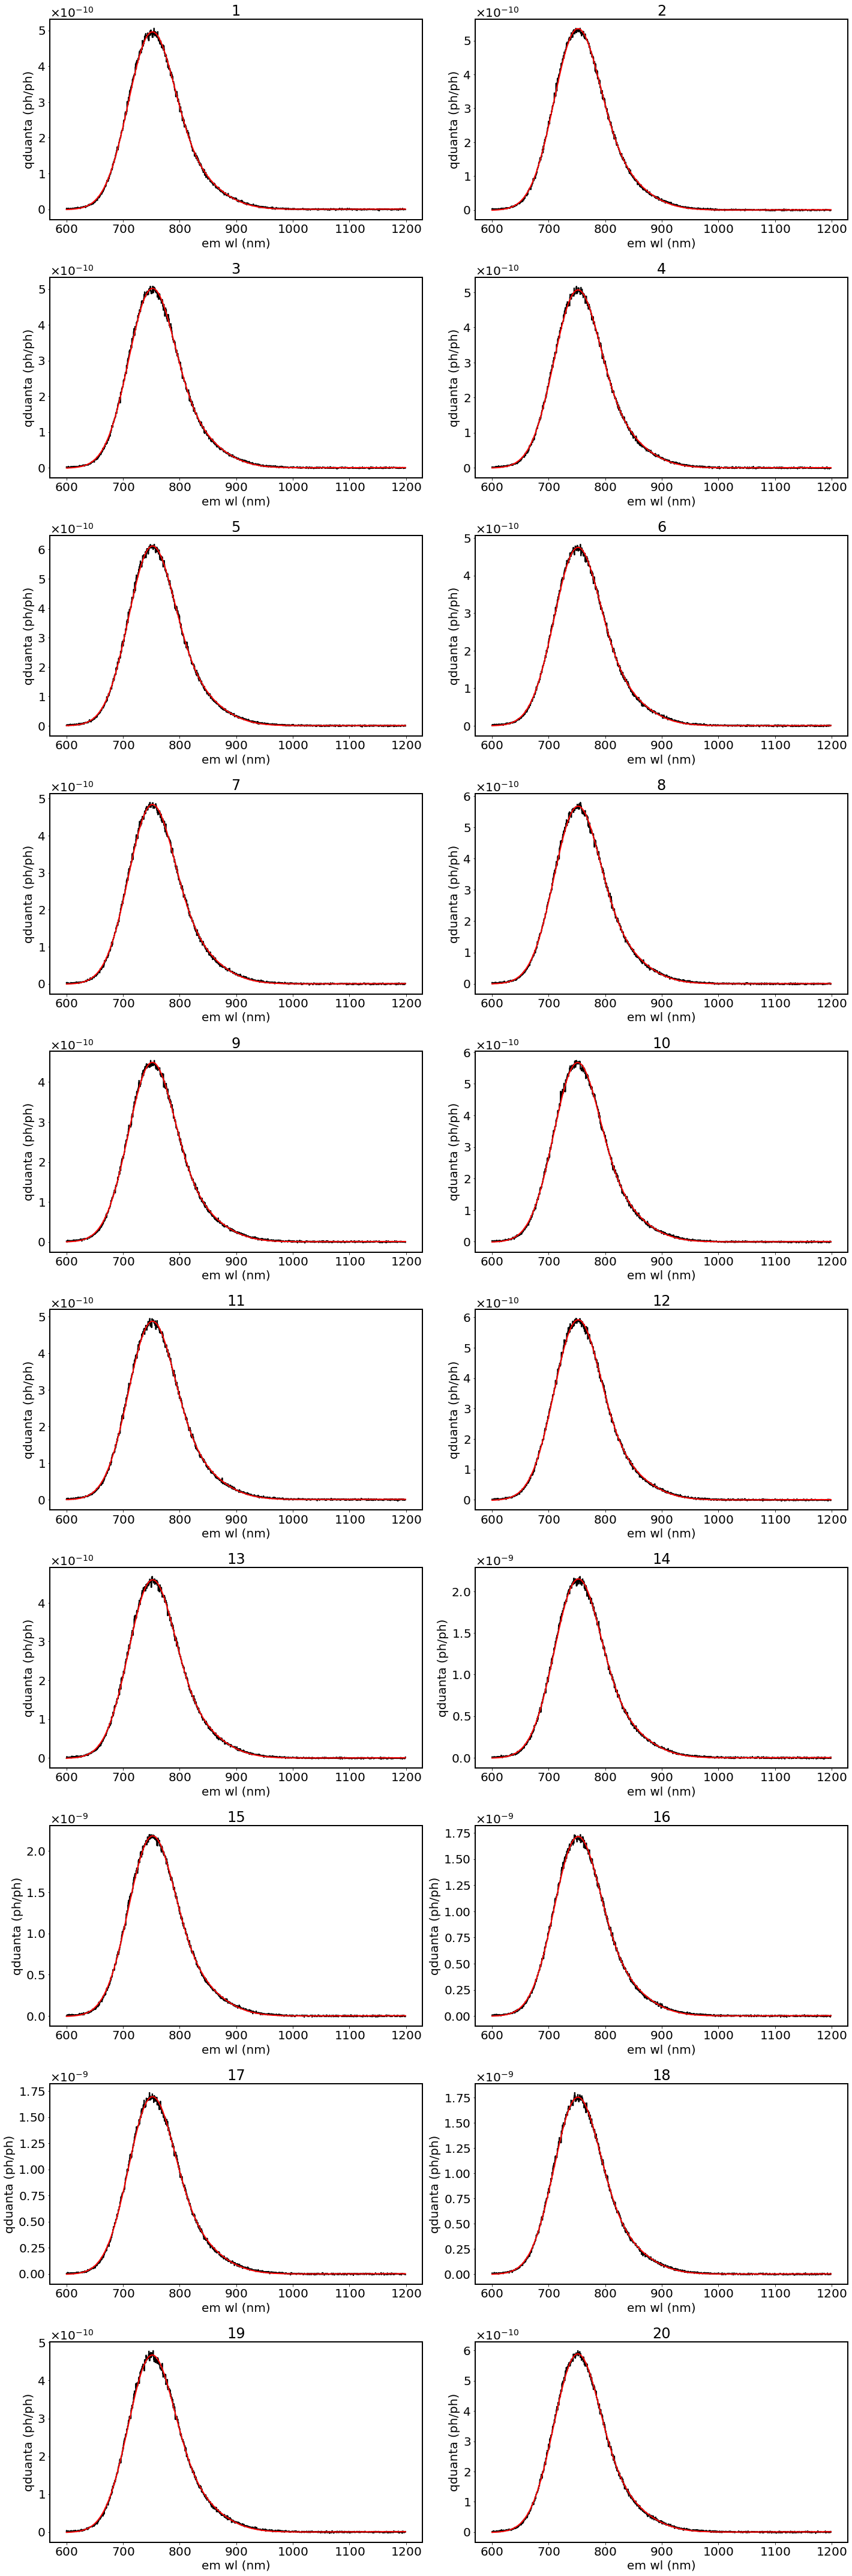

In [28]:
nhalf = int(np.ceil(len(dfs)/2))

plt.figure(figsize=(10*2, 6*nhalf))

fit_values = []

for n, df in enumerate(dfs, start=1):
    data = filter_df(df, crystal=10, grating=2, exposure=.2, ex_wl=400)
    data = data[in_range(data.em_wl, 600, 1200)]

    seed = 5e-8, 755, 40, 5e-9, 850, 40, -1.1e-13, 3e-16
    f    = fit(double_gauss_poly, data.em_wl.values, data.dquanta.values,
               seed      = seed,
               maxfev    = 10**5)

    fit_values.append(f.values)
    
    plt.subplot(nhalf, 2, n)
    plt.plot(data.em_wl, data.dquanta, label=str(n), drawstyle="steps")
    plt.plot(data.em_wl, f.fn(data.em_wl), "r-")

    plt.xlabel("em wl (nm)")
    plt.ylabel("qduanta (ph/ph)")
    plt.title (str(n))

plt.tight_layout()

fit_values = np.stack(fit_values)

In [29]:
irrad_time  = np.cumsum(np.append([0], irradiation_times))
a1, m1, s1, a2, m2, s2, p11, p12 = fit_values.T 

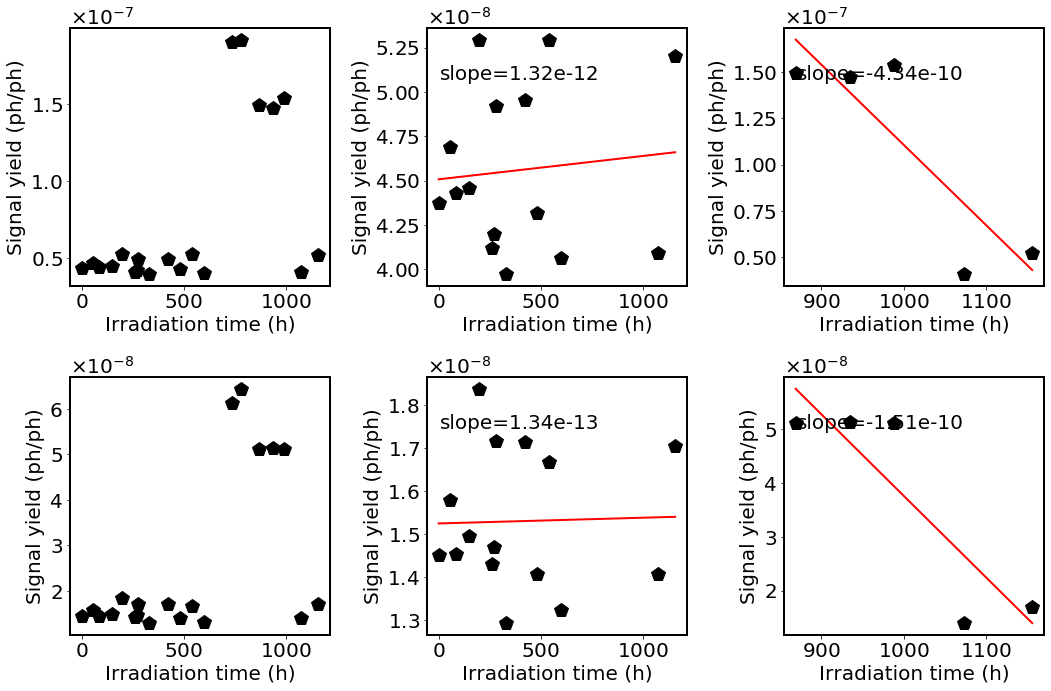

In [30]:
plt.figure(figsize=(15, 10))
for k, a in enumerate([a1, a2]):
    plt.subplot(2, 3, 1 + 3*k)
    s  = slice(None)
    plt.plot(irrad_time[s], a[s], "p")
    plt.xlabel("Irradiation time (h)")
    plt.ylabel("Signal yield (ph/ph)")

    plt.subplot(2, 3, 2 + 3*k)
    s  = [True]*13 + [False] * 5 + [True] * (len(a1) - 18)
    f  = fit(polynom, irrad_time[s], a[s], (0, 1))
    plt.plot(irrad_time[s], a[s], "p", label=f"$I_1$: {f.values[0]:.2e} + {f.values[1]:.2e} t")
    plt.plot(irrad_time[s], f.fn(irrad_time[s]), "-r")
    plt.xlabel("Irradiation time (h)")
    plt.ylabel("Signal yield (ph/ph)")
    plt.text(0.05, .8, f"slope={f.values[1]:.2e}", transform=plt.gca().transAxes)

    plt.subplot(2, 3, 3 + 3*k)
    s  = [False]*15 + [True] * 3 + [True] * (len(a1) - 18)
    f  = fit(polynom, irrad_time[s], a[s], (0, 1))
    plt.plot(irrad_time[s], a[s], "p", label=f"$I_1$: {f.values[0]:.2e} + {f.values[1]:.2e} t")
    plt.plot(irrad_time[s], f.fn(irrad_time[s]), "-r")
    plt.xlabel("Irradiation time (h)")
    plt.ylabel("Signal yield (ph/ph)")
    plt.text(0.05, .8, f"slope={f.values[1]:.2e}", transform=plt.gca().transAxes)


plt.tight_layout()

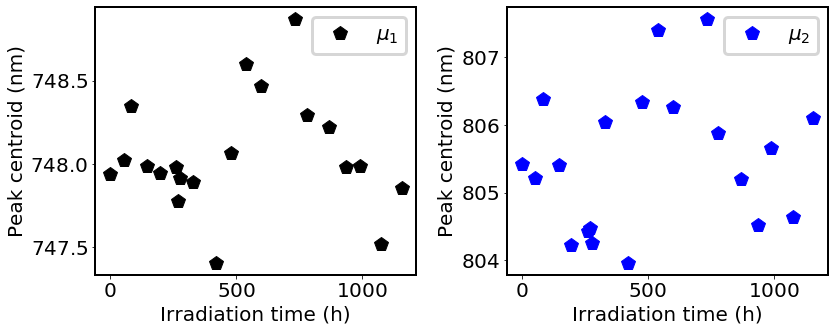

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(irrad_time, m1, "pk", label="$\mu_1$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak centroid (nm)")

plt.subplot(1, 2, 2)
plt.plot(irrad_time, m2, "pb", label="$\mu_2$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak centroid (nm)")

plt.tight_layout()

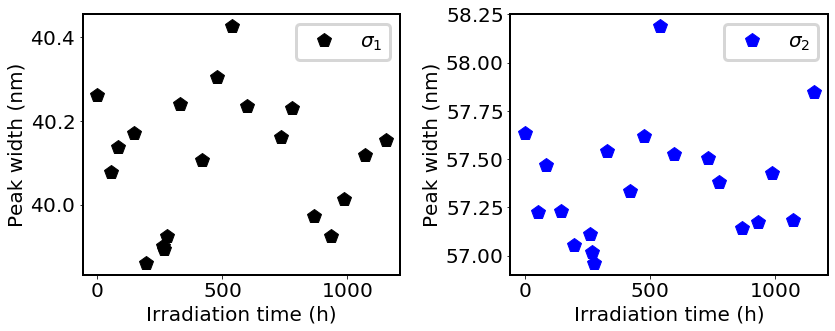

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(irrad_time, s1, "pk", label="$\sigma_1$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak width (nm)")

plt.subplot(1, 2, 2)
plt.plot(irrad_time, s2, "pb", label="$\sigma_2$")
plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("Peak width (nm)")

plt.tight_layout()

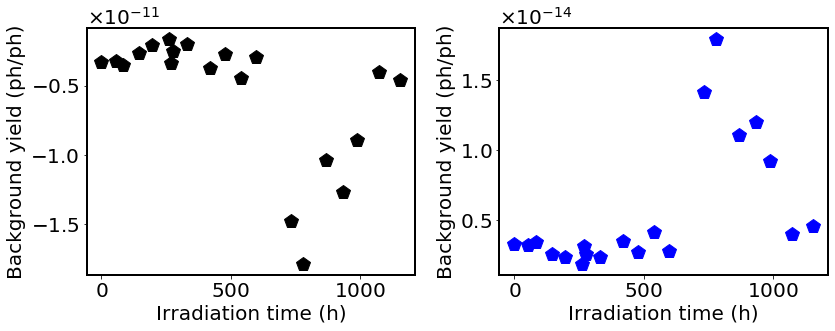

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(irrad_time, p11, "pk")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Background yield (ph/ph)");

plt.subplot(1, 2, 2)
plt.plot(irrad_time, p12, "pb")
plt.xlabel("Irradiation time (h)")
plt.ylabel("Background yield (ph/ph)");

plt.tight_layout()